In [1]:
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from tensorflow.keras.datasets.mnist import load_data

(train_images, train_labels), test_ds = load_data()

# set test env.
n_data = train_images.shape[0]
n_features = train_images.shape[1]*train_images.shape[2]
b_size = 64
n_batch = n_data//b_size
epochs = 20
lr = 0.03
units= [64, 32, 10]

# initialize W, B
W1 = normal(0, 1, (n_features, units[0]))
B1 = zeros(units[0])

W2 = normal(0, 1, (units[0], units[1]))
B2 = zeros(units[1])

W3 = normal(0, 1, (units[1], units[2]))
B3 = zeros(units[2])

print(colored("W/B shapes", "green"))
print(f'W1/B1:  {W1.shape}/{B1.shape}')
print(f'W2/B2:  {W2.shape}/{B2.shape}')
print(f'W3/B3:  {W3.shape}/{B3.shape}')

W/B shapes
W1/B1:  (784, 64)/(64,)
W2/B2:  (64, 32)/(32,)
W3/B3:  (32, 10)/(10,)


In [2]:
losses, accs = list(), list()
for epoch in range(epochs):
    n_correct, n_data = 0, 0
    for b_idx in range(n_batch):
        # get minbatch
        start_idx = b_idx*b_size
        end_idx = (b_idx+1)*b_size # start_idx + b_size
        images = train_images[start_idx: end_idx, ...]
        
        X = images.reshape(b_size, -1)
        Y = train_labels[start_idx : end_idx]

        ### forward propagation
        # dense1
        Z1 = X @ W1 + B1
        A1 = 1/(1 + np.exp(-Z1))

        # dense2
        Z2 = A1 @ W2 + B2
        A2 = 1/(1 + np.exp(-Z2))

        # dense3
        L = A2 @ W3 + B3
        # loss
        Pred = np.exp(L)/np.sum(np.exp(L), axis=1, keepdims=True)
        J = np.mean(-np.log(Pred[np.arange(b_size), Y]))
        losses.append(J)

        # calculate accuracy
        Pred_label = np.argmax(Pred, axis=1)
        n_correct += np.sum(Pred_label == Y)
        n_data += b_size
        
        # backpropagation
        labels = Y.copy()
        Y = np.zeros_like(Pred)
        Y[np.arange(b_size), labels] = 1
        # loss
        DL = -1/b_size*(Y - Pred)
        # dense3
        dA2 = DL @ W3.T
        dW3 = A2.T @ DL
        dB3 = np.sum(DL, axis=0)
        # dense2
        dZ2 = dA2 * A2*(1-A2)
        dA1 = dZ2 @ W2.T
        dW2 = A1.T @ dZ2
        dB2 = np.sum(dZ2, axis=0)
        # dense1
        dZ1 = dA1 * A1*(1-A1)
        dW1 = X.T @ dZ1
        dB1 = np.sum(dZ1, axis=0)

        # parameter update
        W3, B3 = W3-lr*dW3, B3-lr*dB3
        W2, B2 = W2-lr*dW2, B2-lr*dB2
        W1, B1 = W1-lr*dW1, B1-lr*dB1
    accs.append(n_correct/n_data)


<ipython-input-2-f47b78531ff6>:16: RuntimeWarning: overflow encountered in exp
  A1 = 1/(1 + np.exp(-Z1))


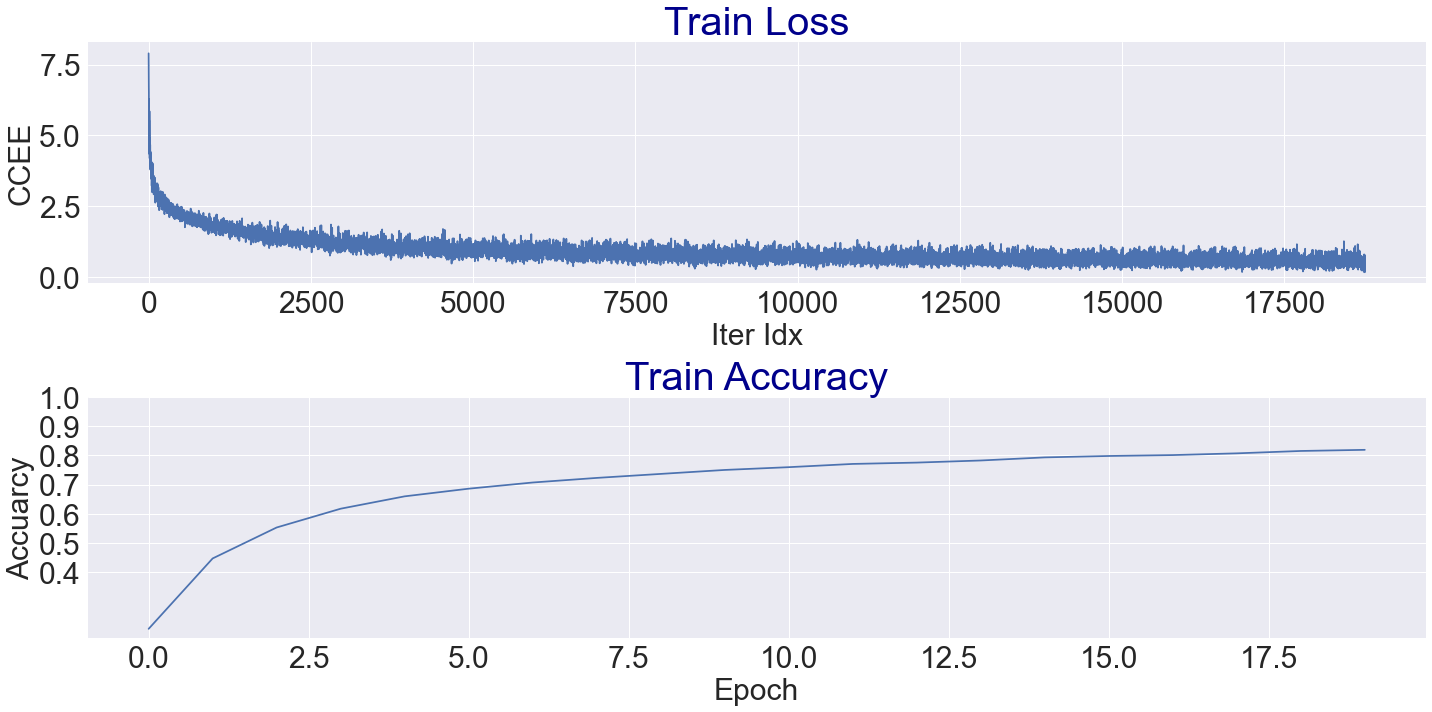

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_title("Train Loss", color='darkblue', fontsize=40)
axes[0].set_xlabel("Iter Idx", fontsize=30)
axes[0].set_ylabel("CCEE", fontsize=30)

axes[1].set_title("Train Accuracy", color='darkblue', fontsize=40)
axes[1].set_xlabel("Epoch", fontsize=30)
axes[1].set_ylabel("Accuarcy", fontsize=30)
axes[1].set_yticks(np.linspace(0.4, 1.0, 7))
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
fig.tight_layout()